In [7]:
import pandas as pd

In [8]:
d=pd.read_excel("C:/Users/Anonymous/Desktop/ANOVA Projet/BD_anova.xlsx",head=1)


In [9]:
d.head()

,Taux_de_participation_benevole,age
0,6.2,De 0 à 25 ans
1,13.5,De 0 à 25 ans
2,7.5,De 0 à 25 ans
3,10.6,De 0 à 25 ans
4,9.3,De 0 à 25 ans


In [10]:
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

In [11]:
d.dtypes

Taux_de_participation_benevole    float64
age                                object
dtype: object

In [12]:
d["age"].unique()

array(['De 0 à 25 ans', 'De 25 à 34 ans', 'De 35 à 44 ans',
       'De 45 à 54 ans', 'De 55 à 64 ans', 'De 65 à 74 ans',
       'De 75 ans et au dela'], dtype=object)

In [13]:
# Recoding value from numeric to string
d["age"].replace({1: 'De 0 à 25 ans', 2: 'De 25 à 34 ans', 3: 'De 35 à 44 ans',4:'De 45 à 54 ans',5:'De 55 à 64 ans',6:'De 65 à 74 ans',7:'De 75 ans et au dela'}, inplace= True)
    


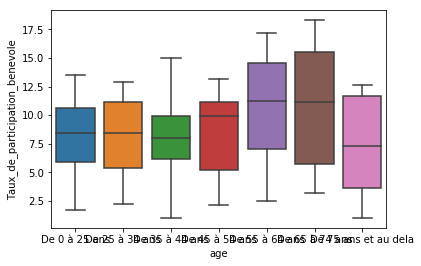

In [14]:
sns.boxplot(x="age",y='Taux_de_participation_benevole',data=d)

In [15]:
d.head()

,Taux_de_participation_benevole,age
0,6.2,De 0 à 25 ans
1,13.5,De 0 à 25 ans
2,7.5,De 0 à 25 ans
3,10.6,De 0 à 25 ans
4,9.3,De 0 à 25 ans


In [16]:
d.info()
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
Taux_de_participation_benevole    56 non-null float64
age                               56 non-null object
dtypes: float64(1), object(1)
memory usage: 976.0+ bytes


,Taux_de_participation_benevole
count,56.0000
mean,8.7000
std,4.6625
min,1.0000
25%,4.3250
50%,9.1000
75%,12.2250
max,18.3000


In [17]:
d["Taux_de_participation_benevole"].groupby(d["age"]).describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
De 0 à 25 ans,8.0,8.0500,3.734396,1.7,5.900,8.40,10.600,13.5
De 25 à 34 ans,8.0,7.9750,4.176721,2.2,5.375,8.45,11.175,12.9
De 35 à 44 ans,8.0,8.1000,4.479477,1.0,6.125,8.00,9.925,15.0
De 45 à 54 ans,8.0,8.3250,4.246259,2.1,5.150,9.90,11.125,13.2
De 55 à 64 ans,8.0,10.4125,5.600112,2.5,7.075,11.25,14.600,17.2
De 65 à 74 ans,8.0,10.6875,6.048716,3.2,5.750,11.15,15.525,18.3
De 75 ans et au dela,8.0,7.3500,4.665374,1.0,3.575,7.30,11.675,12.6


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
results=ols('Taux_de_participation_benevole ~ C(age)',data=d).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Taux_de_participation_benevole   R-squared:                       0.068
Model:                                        OLS   Adj. R-squared:                 -0.046
Method:                             Least Squares   F-statistic:                    0.5953
Date:                            Tue, 18 Feb 2020   Prob (F-statistic):              0.733
Time:                                    19:54:21   Log-Likelihood:                -163.20
No. Observations:                              56   AIC:                             340.4
Df Residuals:                                  49   BIC:                             354.6
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          8.0500      1.686      4.774      0.000       4.662      11.438
C(age)[T.De 25 à 34 ans]          -0.0750      2.384     -0.031      0.975      -4.867       4.717
C(age)[T.De 35 à 44 ans]           0.0500      2.384      0.021      0.983      -4.742       4.842
C(age)[T.De 45 à 54 ans]           0.2750      2.384      0.115      0.909      -4.517       5.067
C(age)[T.De 55 à 64 ans]           2.3625      2.384      0.991      0.327      -2.429       7.154
C(age)[T.De 65 à 74 ans]           2.6375      2.384      1.106      0.274      -2.154       7.429
C(age)[T.De 75 ans et au dela]    -0.7000      2.384     -0.294      0.770      -5.492       4.092
==============================================================================
Omnibus:                       16.368   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.909
Skew:                          -0.199   Prob(JB):                        0.142
Kurtosis:                       1.768   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
table = sm.stats.anova_lm(results)
print(table)

             df       sum_sq    mean_sq         F    PR(>F)
C(age)      6.0   484.415811  80.735968  3.440453  0.002523
Residual  399.0  9363.200045  23.466667       NaN       NaN


In [128]:
Fisher_p_value = table['PR(>F)']['C(age)']



0.0025233652809940883

In [20]:
import scipy as misc
from scipy.stats import levene

In [21]:
from random import seed
from random import gauss
import statistics
import numpy as np

In [22]:
##add first random
s=np.random.normal(8.05,3.73,50)
s
statistics.mean(s)


7.473392506444881

In [23]:
for i in s:
    d=d.append({'Taux_de_participation_benevole':i, 'age':"De 0 à 25 ans"}, ignore_index=True)

In [24]:
##add second
h=np.random.normal(7.975,4.176,50)
statistics.mean(h)

    

7.073757282997791

In [25]:
for i in h:
    d=d.append({'Taux_de_participation_benevole':i, 'age':"De 25 à 34 ans"}, ignore_index=True)


In [26]:
##add s3
z=np.random.normal(8.100,4.479,50)
statistics.mean(z)
    

7.897603998995036

In [27]:

for i in z:
    d=d.append({'Taux_de_participation_benevole':i, 'age':"De 35 à 44 ans"}, ignore_index=True)


In [28]:
##add 4
w=np.random.normal(8.32,4.24,50)
statistics.mean(w)


8.570381414643151

In [29]:

for i in w:
    d=d.append({'Taux_de_participation_benevole':i, 'age':"De 45 à 54 ans"}, ignore_index=True)


In [30]:
##add s5
m=np.random.normal(10.410,5.6,50)
statistics.mean(m)



9.11976046428999

In [31]:
for i in m:
    d=d.append({'Taux_de_participation_benevole':i, 'age':"De 55 à 64 ans"}, ignore_index=True)

In [32]:
##add s6
b=np.random.normal(10.68,6.04,50)
statistics.mean(b)


10.688186361605094

In [33]:

for i in b:
    d=d.append({'Taux_de_participation_benevole':i, 'age':"De 65 à 74 ans"}, ignore_index=True)

In [34]:
##add s7
q=np.random.normal(7.35,4.66,50)
statistics.mean(q)



8.851555130167625

In [35]:
for i in q:
    d=d.append({'Taux_de_participation_benevole':i, 'age':"De 75 ans et au dela"}, ignore_index=True)

In [36]:
d.info()
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 2 columns):
Taux_de_participation_benevole    406 non-null float64
age                               406 non-null object
dtypes: float64(1), object(1)
memory usage: 6.4+ KB


,Taux_de_participation_benevole
count,406.000000
mean,8.549093
std,4.931034
min,-4.227551
25%,5.288550
50%,8.321013
75%,11.683660
max,26.163855


In [37]:
d["Taux_de_participation_benevole"].groupby(d["age"]).describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
De 0 à 25 ans,58.0,7.552925,3.697068,0.394810,5.011218,7.036624,10.193859,16.463809
De 25 à 34 ans,58.0,7.198067,3.948242,-3.733898,4.977564,7.261692,10.345215,15.177848
De 35 à 44 ans,58.0,7.925521,4.245839,-2.805482,5.161479,7.808239,10.148017,15.818486
De 45 à 54 ans,58.0,8.536536,4.198640,-1.798763,5.812162,8.585963,11.387543,18.010619
De 55 à 64 ans,58.0,9.298069,5.235971,-1.022157,5.747046,9.340936,13.535080,22.025691
De 65 à 74 ans,58.0,10.688092,6.541890,-3.588544,6.489183,11.264900,15.445864,26.163855
De 75 ans et au dela,58.0,8.644444,5.398361,-4.227551,5.231200,9.174055,11.629598,23.420954


In [38]:
results=ols('Taux_de_participation_benevole ~ C(age)',data=d).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Taux_de_participation_benevole   R-squared:                       0.049
Model:                                        OLS   Adj. R-squared:                  0.035
Method:                             Least Squares   F-statistic:                     3.440
Date:                            Tue, 18 Feb 2020   Prob (F-statistic):            0.00252
Time:                                    19:54:24   Log-Likelihood:                -1213.1
No. Observations:                             406   AIC:                             2440.
Df Residuals:                                 399   BIC:                             2468.
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.5529      0.636     11.874      0.000       6.302       8.803
C(age)[T.De 25 à 34 ans]          -0.3549      0.900     -0.394      0.693      -2.123       1.414
C(age)[T.De 35 à 44 ans]           0.3726      0.900      0.414      0.679      -1.396       2.141
C(age)[T.De 45 à 54 ans]           0.9836      0.900      1.093      0.275      -0.785       2.752
C(age)[T.De 55 à 64 ans]           1.7451      0.900      1.940      0.053      -0.023       3.514
C(age)[T.De 65 à 74 ans]           3.1352      0.900      3.485      0.001       1.367       4.904
C(age)[T.De 75 ans et au dela]     1.0915      0.900      1.213      0.226      -0.677       2.860
==============================================================================
Omnibus:                        1.530   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.379
Skew:                          -0.001   Prob(JB):                        0.502
Kurtosis:                       3.286   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
x=results.summary().AIC
print(x)

AttributeError: 'Summary' object has no attribute 'AIC'

In [39]:
# d.to_excel("C:/Users/Anonymous/Desktop/BB.xlsx")

In [60]:
for i in range(1,100):
    new_data=pd.read_excel("C:/Users/Anonymous/Desktop/ANOVA Projet/BD_anova.xlsx",head=1)
    